## Misura del periodo di un pendolo semplice

In questo semplice esperimento virtuale, utilizzerete l'applicazione https://phet.colorado.edu/en/simulation/pendulum-lab per misurare il periodo $\tau$ di un pendolo in funzione della lunghezza $L$ del filo. La massa attaccata al pendolo è $m$ e l'angolo iniziale rispetto alla verticale è $\theta_i$.

- Utilizzate "piccoli" valori di $\theta_i$ (diciamo < $20^o$)
- Misurate il periodo $\tau$ a partire dalla durata di 5-10 oscillazioni
- Stimate l'incertezza $\Delta \tau$ ripetendo la misura una seconda volta e definendo $\Delta \tau = |\tau_\prime - \tau|/2$, dove $\tau^\prime$ è la seconda misura

I dati verranno raccolti a partire dalle misure effettuate durante il corso. Dopo una prima analisi dati, forniremo una spiegazione fisica delle osservazioni empiriche e prediremo il comportamento atteso su un pianeta extraterrestre.

In [3]:
# Collect data here in 4 columns: L, m, tau, dtau
data = """
1.00 1.50 2.00 0.02
1.00 1.5 1.992 0.003
1.00 1.00 2.0 0.05
1.00 0.10 2.03 0.02
1.00 0.10 2.02 0.05
1 0.1 2.04 0.08
0.95 1.20 1.96 0.02
0.90 1.50 1.93 0.01
0.83 1.50 1.864 0.04
0.83 1.50 1.864 0.004
0.80 1.00 1.815 0.025
0.80 0.40 1.797 0.012
0.8 0.3 1.797 0.001
0.70 1.50 1.28 0.002
0.70 1.30 1.712 0.005
0.70 1.00 1.68 0.03
0.70 1.00 1.68 0.01
0.70 1.00 1.62 0.03
0.70 0.90 1.72 0.04
0.69 1.09 1.68 0.002
0.66 0.66 1.63 0.02
0.63  1.35  1.64  0.02
0.60 1.00 1.58 0.01
0.60 0.60 1.55 0.03
0.60 0.40 1.56 0.015
0.57  0.76  1.504  0.002
0.50 1.50 1.45 0.01
0.50 1.50 1.42 0.01
0.50 1.00 1.452 0.001
0.50 0.50 1.44 0.02
0.50 0.10 1.42 0.01
0.5 0.7 1.425 0.004
0.40 1.30 1.29 0.02
0.40 1.20 1.285 0.005
0.40 0.10 1.30 0.01
0.30 1.50 1.11 0.01
0.20 0.40 0.91 0.02
0.18  0.73 0.868 0.09
0.17 0.23 0.83 0.04
0.13 1.20 0.73 0.012
0.13 0.98 0.748 0.004
0.10 1.00 0.64 0.01
"""

### Legge di scala e sua spiegazione fisica

Tracciamo dapprima $\tau$ in funzione di $L$, poi usando una scala logaritmica. Cosa si osserva? Fornite una spiegazione di queste osservazioni per mezzo di una semplice analisi dimensionale.

Text(0, 0.5, 'tau')

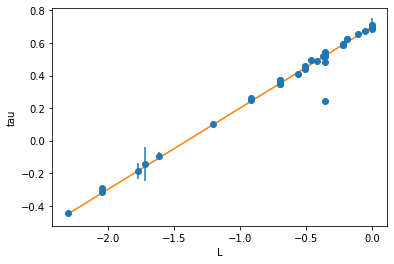

In [21]:
import numpy
from matplotlib import pyplot

def parse(data):
    x, y, z, w = [], [], [], []
    for line in data.split("\n"):
        if len(line) == 0:
            continue
        xi, yi, zi, wi = line.split()
        x.append(xi)
        y.append(yi)
        z.append(zi)
        w.append(wi)
    return numpy.array(x, dtype=float), numpy.array(y, dtype=float), \
           numpy.array(z, dtype=float), numpy.array(w, dtype=float),

L, m, tau, dtau = parse(data)
#pyplot.xlim(0)
#pyplot.ylim(0)

#pyplot.errorbar(L, tau, dtau, fmt='o')
#pyplot.plot(L, L*3, '-')
pyplot.errorbar(numpy.log(L), numpy.log(tau), 1/tau * dtau, fmt='o')
#pyplot.plot(numpy.log(L), numpy.log(tau), 'o')
pyplot.plot(numpy.log(L), 0.5 * numpy.log(L) + 0.7, '-')

pyplot.xlabel('L')
pyplot.ylabel('tau')

### Predizione del periodo su un pianeta extraterrestre

Utilizzate l'analisi dimensionale per predire come il periodo cambierebbe se effettuassimo le misure su un pianeta con accelerazione di gravità doppia rispetto a quella terrestre.

- Per $L$ fissato, di quanto varierebbe $\tau$? Come sarebbe modificato il grafico $\log(\tau)$ in funzione di $\log(L)$?
- Verificate la predizione modificando l'accelerazione di gravità sull'applicazione PHET e ripetendo la misura del periodo

### Regressione lineare

A livello di analisi dati, potete effettare una semplice regressione lineare per determinare empiricamente l'esponente della legge di scala tra $\tau$ e $L$. Come potremmo dire se il risultato è compatibile con quello previsto dall'analisi dimensionale?

In [ ]:
def linear_fit(x, y):
    """
    Simple linear regression of input `x` and `y` lists (or numpy
    arrays), without uncertainty estimate

    Return: a and b coefficients in a*x + b
    """
    # Use numpy.sum for large arrays
    assert len(x) == len(x)
    n = len(x)
    dof = n - 2
    sx = sum(x)
    sy = sum(y)
    sxy = sum(x*y)
    sxx = sum(x**2)

    # Linear fit to a*x+b
    a = (n*sxy - sx*sy) / (n*sxx - sx**2)
    b = (sy - a*sx) / n

    return a, b

a, b = linear_fit(numpy.log(L), numpy.log(tau))
# print(a, b)
pyplot.plot(numpy.log(L), numpy.log(tau), 'o')
pyplot.plot(numpy.log(L), a*numpy.log(L) + b, '-')

### Ruolo della massa e dell'ampiezza delle oscillazioni

- L'analisi dimensionale mostra che il periodo non può dipendere dalla massa dell'oggetto attaccato al pendolo. A livello di analisi dati, come potreste mettere in evidenza questa predizione?

- L'analisi dimensionale non fornisce informazioni sul ruolo dell'angolo iniziale $\theta_i$. Misurate nuovamente il periodo per alcuni valori di $L$ usando un valore fissato di $\theta_i$ "sufficientemente grande" (diciamo $45^\circ$). Analizzate nuovamente la relazione tra $\tau$ e $L$ in scala logaritmica e interpretate i risultati.